In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from typing import List

In [3]:
from tqdm import tqdm

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
sns.set_style("whitegrid")

# 1. EDA

First load data.

In [7]:
data_dir = './data/'
df_energy = pd.read_csv(data_dir + 'energy_dataset.csv')
df_weather = pd.read_csv(data_dir + 'weather_features.csv')

## Basic Info
Take a look at the basic information of data.

In [8]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [9]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [10]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [11]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

## NaN/0 Data Analysis

### NaN

In [12]:
def missing_value_counter(df:pd.DataFrame, cols:List[str]) -> pd.DataFrame:
    """
    Count missing values in specified columns.
    @param df: dataframe
    @param cols: columns to be calculated
    return: summary information
    """
    res = pd.DataFrame(cols, columns=['Feature'])
    na_cnts = [sum(df[col].isna()) for col in cols]
    res['NA Count'] = na_cnts
    res['NA Rate'] = res['NA Count'] / df.shape[0]
    res = res[res['NA Count'] != 0]
    res = res.sort_values(by='NA Count', ascending=False).reset_index(drop=True)
    return res

In [13]:
missing_value_counter(df_energy, df_energy.columns)

,Feature,NA Count,NA Rate
0,generation hydro pumped storage aggregated,35064,1.000000
1,forecast wind offshore eday ahead,35064,1.000000
2,total load actual,36,0.001027
3,generation waste,19,0.000542
4,generation marine,19,0.000542
5,generation hydro pumped storage consumption,19,0.000542
6,generation biomass,19,0.000542
7,generation fossil oil,19,0.000542
8,generation hydro run-of-river and poundage,19,0.000542
9,generation fossil peat,18,0.000513


`generation hydro pumped storage aggregated` and `forecast wind offshore eday ahead` are meaningless features.

Take a look at the rows with missing value.

In [14]:
df_energy[df_energy['generation waste'].isna()]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
99,2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.0,NaN,8233.0,21912.0,21182.0,35.20,59.68
108,2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3932.0,NaN,9258.0,23209.0,NaN,35.50,79.14
109,2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4236.0,NaN,9156.0,23725.0,NaN,36.80,73.95
110,2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4215.0,NaN,9072.0,23614.0,NaN,32.50,71.93
111,2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4050.0,NaN,8779.0,22381.0,NaN,30.00,71.50
112,2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3728.0,NaN,8426.0,21371.0,NaN,30.00,71.85
113,2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3175.0,NaN,7946.0,20760.0,NaN,30.60,80.53
451,2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,NaN,6434.0,38642.0,39304.0,70.01,88.95
452,2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN,6907.0,38758.0,39262.0,69.00,87.94
643,2015-01-27 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,NaN,9807.0,38968.0,38335.0,66.00,83.97


In [15]:
mask = df_energy['generation waste'].isna()
missing_value_counter(df_energy[~mask], df_energy.columns)

,Feature,NA Count,NA Rate
0,generation hydro pumped storage aggregated,35045,1.000000
1,forecast wind offshore eday ahead,35045,1.000000
2,total load actual,23,0.000656
3,generation biomass,1,0.000029
4,generation fossil oil,1,0.000029
5,generation hydro pumped storage consumption,1,0.000029
6,generation hydro run-of-river and poundage,1,0.000029
7,generation marine,1,0.000029


It seems that most missing values shows up together.

In [16]:
missing_value_counter(df_weather, df_weather.columns)

,Feature,NA Count,NA Rate


Great! There is no missing value in weather data.

In [17]:
df_energy.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], axis=1, inplace=True)

### Zero

In [18]:
def value_counter(df:pd.DataFrame, cols:List[str], val:float) -> pd.DataFrame:
    """
    Count specified values in specified columns.
    @param df: dataframe
    @param cols: columns to be calculated
    return: summary information
    """
    res = pd.DataFrame(cols, columns=['Feature'])
    na_cnts = [sum(df[col] == val) for col in cols]
    res['Value Count'] = na_cnts
    res['Rate'] = res['Value Count'] / df.shape[0]
    res = res[res['Value Count'] != 0]
    res = res.sort_values(by='Value Count', ascending=False).reset_index(drop=True)
    return res

In [19]:
value_counter(df_energy, df_energy.columns, 0)

,Feature,Value Count,Rate
0,generation fossil coal-derived gas,35046,0.999487
1,generation wind offshore,35046,0.999487
2,generation fossil oil shale,35046,0.999487
3,generation fossil peat,35046,0.999487
4,generation geothermal,35046,0.999487
5,generation marine,35045,0.999458
6,generation hydro pumped storage consumption,12607,0.359543
7,generation fossil brown coal/lignite,10517,0.299937
8,forecast solar day ahead,539,0.015372
9,generation other,4,0.000114


Features with zero rate above 0.99 can also be treated as invalid featrues.

In [20]:
cols = ['generation fossil coal-derived gas', 'generation wind offshore', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine']
df_energy.drop(cols, axis=1, inplace=True)

In [21]:
value_counter(df_weather, df_weather.columns, 0)

,Feature,Value Count,Rate
0,snow_3h,178129,0.998503
1,rain_3h,176541,0.989602
2,rain_1h,159008,0.891320
3,clouds_all,82194,0.460739
4,wind_deg,24920,0.139689
5,wind_speed,18490,0.103646
6,humidity,63,0.000353
7,pressure,2,0.000011


In [22]:
df_weather[df_weather['snow_3h']!=0]

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
825,2015-02-04 08:00:00+01:00,Valencia,278.0500,278.0500,278.0500,996,59,6,318,0.3,0.0,0.625,92,500,rain,light rain,10d
826,2015-02-04 09:00:00+01:00,Valencia,278.9500,278.9500,278.9500,997,51,6,8,0.3,0.0,0.625,92,500,rain,light rain,10d
827,2015-02-04 10:00:00+01:00,Valencia,278.4500,278.4500,278.4500,998,46,7,334,0.3,0.0,0.625,92,500,rain,light rain,10d
828,2015-02-04 11:00:00+01:00,Valencia,278.4500,278.4500,278.4500,1000,42,4,325,0.3,0.0,1.125,92,500,rain,light rain,10d
829,2015-02-04 12:00:00+01:00,Valencia,279.2500,279.2500,279.2500,1001,39,17,319,0.3,0.0,1.125,92,500,rain,light rain,10d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81938,2016-03-08 05:00:00+01:00,Bilbao,276.8285,276.8285,276.8285,1019,92,1,174,0.3,0.0,0.001,46,500,rain,light rain,10
81942,2016-03-08 09:00:00+01:00,Bilbao,277.7395,277.7395,277.7395,1021,90,1,229,0.9,0.0,0.129,81,501,rain,moderate rain,10
81948,2016-03-08 15:00:00+01:00,Bilbao,280.8440,280.8440,280.8440,1022,83,1,158,0.9,0.0,0.129,83,501,rain,moderate rain,10
81954,2016-03-08 21:00:00+01:00,Bilbao,279.7230,279.7230,279.7230,1022,91,1,294,0.9,0.0,0.129,83,501,rain,moderate rain,10


## Data Visualization

### Energy Data

In [23]:
df_energy['time'] = pd.to_datetime(df_energy['time'])

In [24]:
def dist_line_plot(df:pd.DataFrame, time_col:str, target_col:str):
    """
    Draw distribution plot of target_col and line plot of target_col VS time
    @param df: dataframe
    @param time_col: time column name
    @param target_col: target column name
    """
    plt.figure(figsize=(12,4))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax2.tick_params(labelrotation=45)

    sns.distplot(df[target_col], ax=ax1)
    sns.lineplot(x=time_col, y=target_col, data=df, ax=ax2)
    plt.suptitle(target_col)
    plt.show()

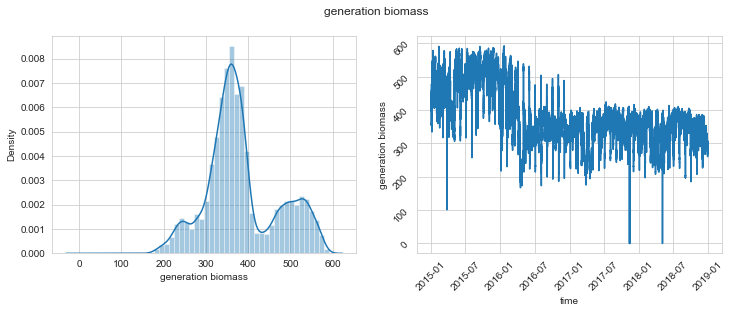

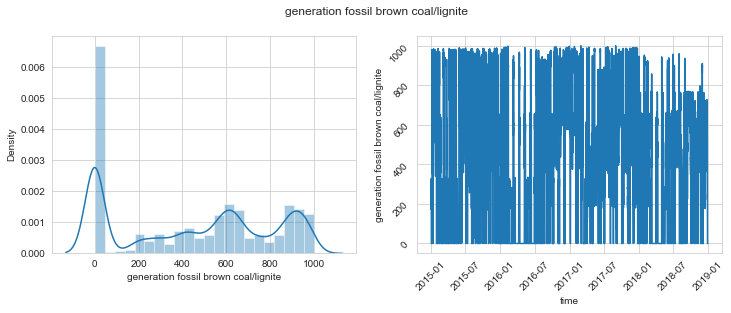

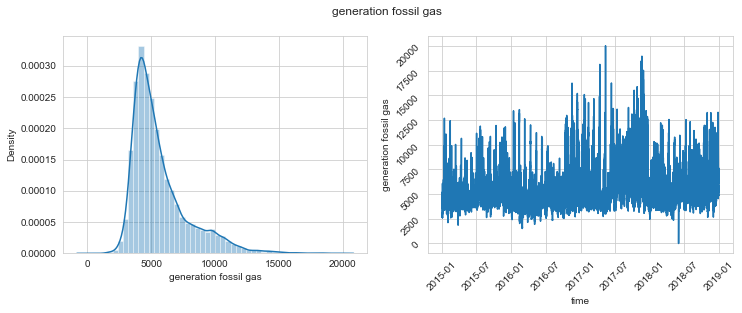

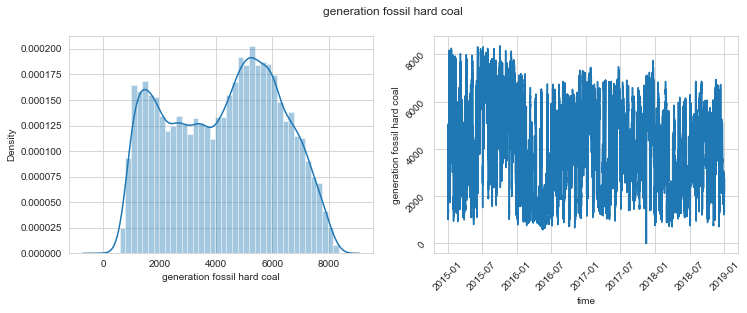

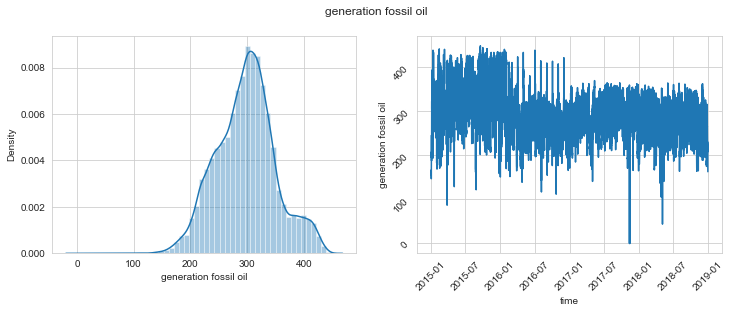

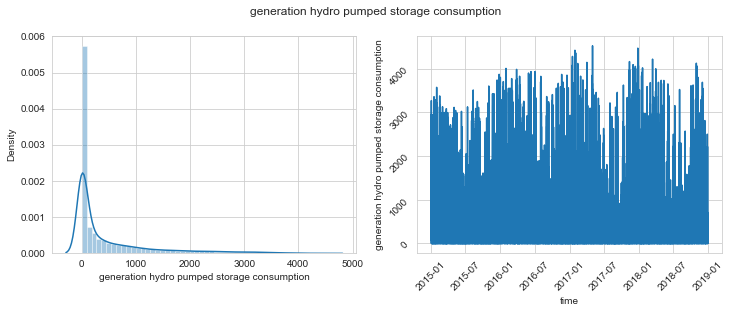

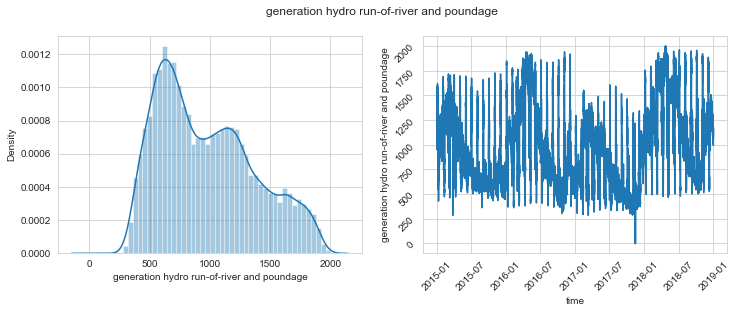

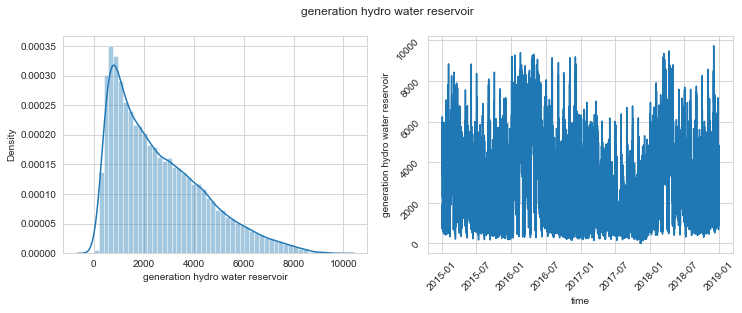

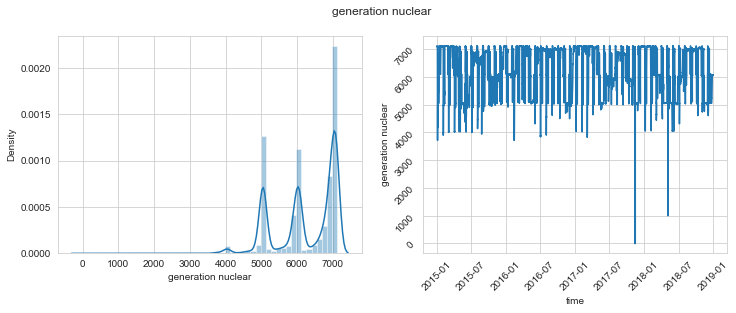

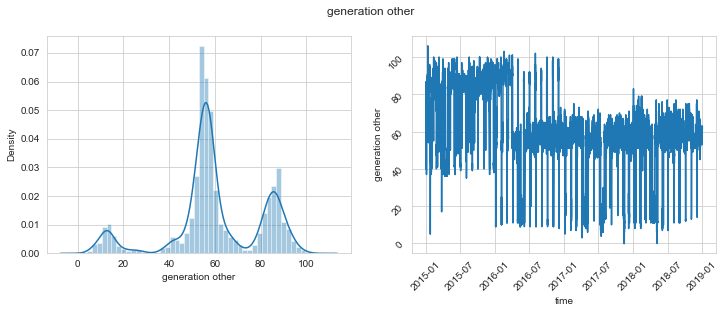

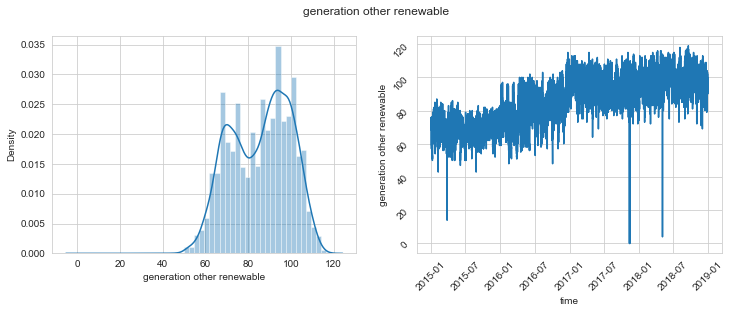

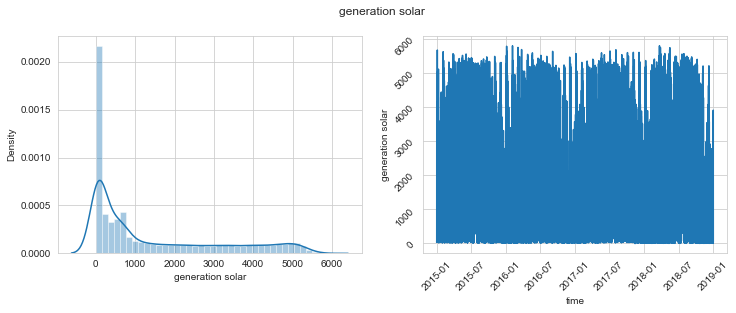

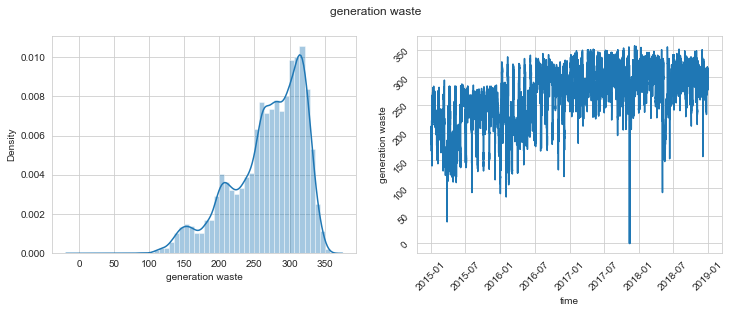

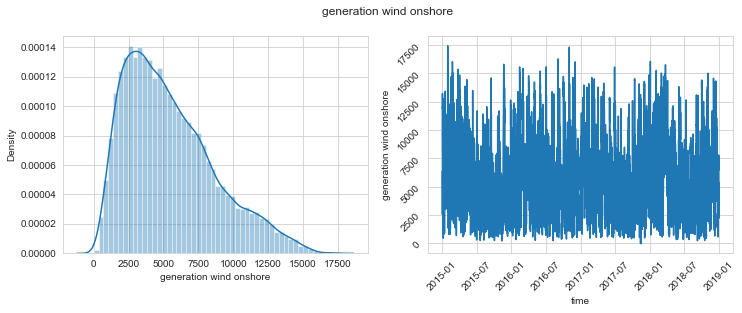

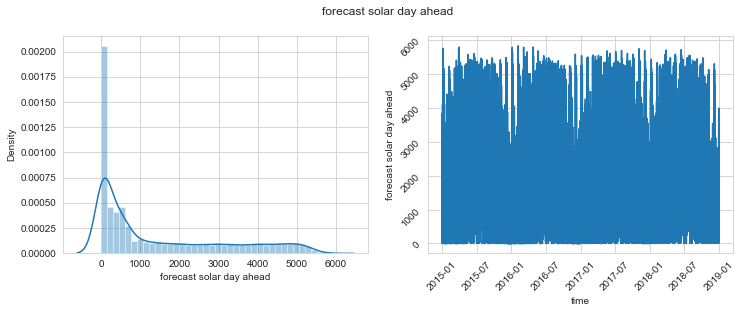

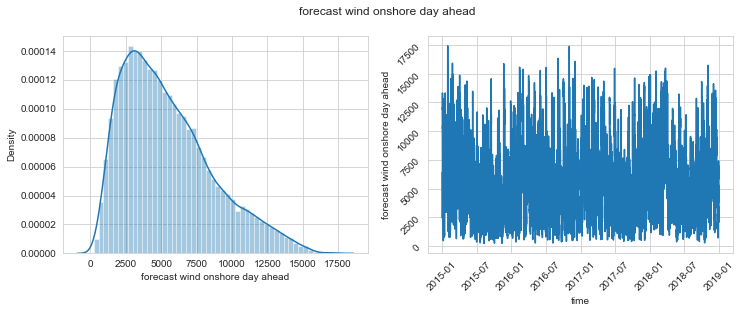

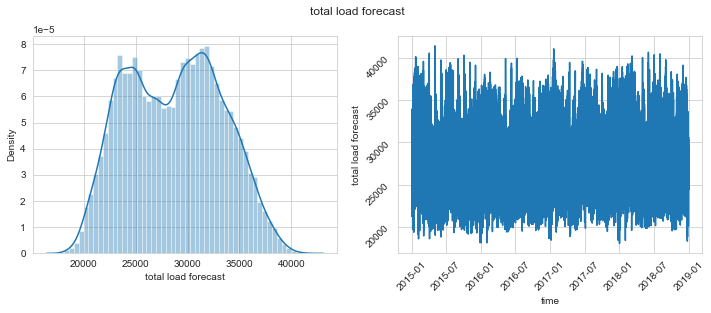

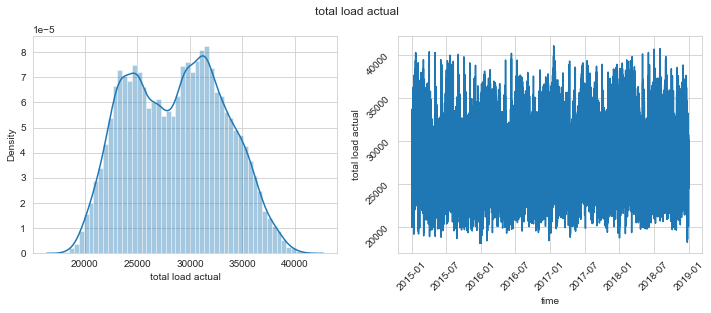

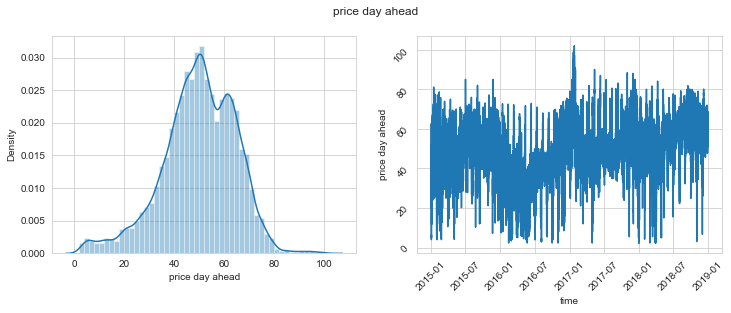

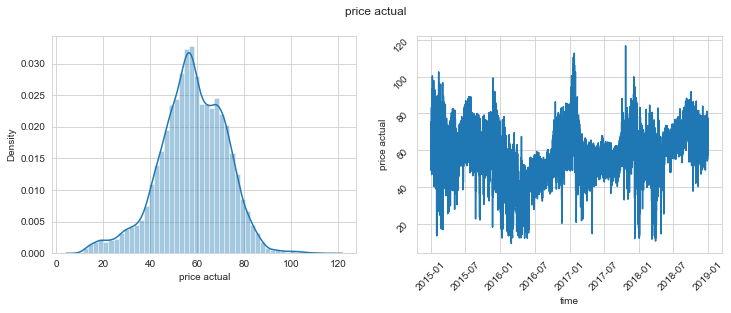

In [25]:
for feat in list(df_energy.columns):
    if feat != 'time':
        dist_line_plot(df_energy, 'time', feat)

### Weather Data

In [26]:
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'])

In [27]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


<AxesSubplot:xlabel='city_name', ylabel='count'>

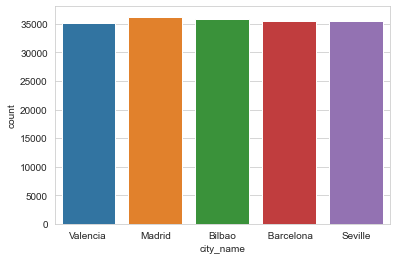

In [28]:
sns.countplot(df_weather['city_name'])

The weather data contains 5 different cities, we have to consider how to combine them together, such as avg, when joining the energy data and the weather data.

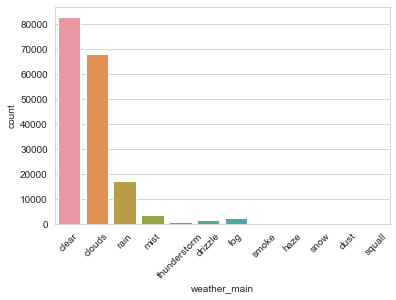

In [29]:
sns.countplot(df_weather['weather_main'])
plt.xticks(rotation=45)
plt.show()

In [30]:
(df_weather['weather_main'] + '|' + df_weather['weather_description'] + '|' + df_weather['weather_id'].astype(str)).unique()

array(['clear|sky is clear|800', 'clouds|few clouds|801',
       'clouds|scattered clouds|802', 'clouds|broken clouds|803',
       'clouds|overcast clouds|804', 'rain|light rain|500',
       'rain|moderate rain|501', 'rain|heavy intensity rain|502',
       'mist|mist|701', 'rain|heavy intensity shower rain|522',
       'rain|shower rain|521', 'rain|very heavy rain|503',
       'thunderstorm|thunderstorm with heavy rain|202',
       'thunderstorm|thunderstorm with light rain|200',
       'thunderstorm|thunderstorm with rain|201',
       'thunderstorm|proximity thunderstorm|211',
       'thunderstorm|thunderstorm|211',
       'rain|light intensity shower rain|520',
       'drizzle|light intensity drizzle|300', 'fog|fog|741',
       'drizzle|drizzle|301', 'smoke|smoke|711',
       'drizzle|heavy intensity drizzle|302', 'haze|haze|721',
       'rain|proximity shower rain|521',
       'drizzle|light intensity drizzle rain|310', 'snow|light snow|600',
       'snow|rain and snow|616', 'snow|l

We can see that `weather_description` is a sub-category of `weather_main`.

For simplicity, let's use avg to combine weather data from different cities.

In [31]:
num_feats = [
    'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 
    'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 
    'snow_3h', 'clouds_all'
]
df_weather2 = df_weather[num_feats+['dt_iso']].groupby(['dt_iso'], as_index=False).mean()

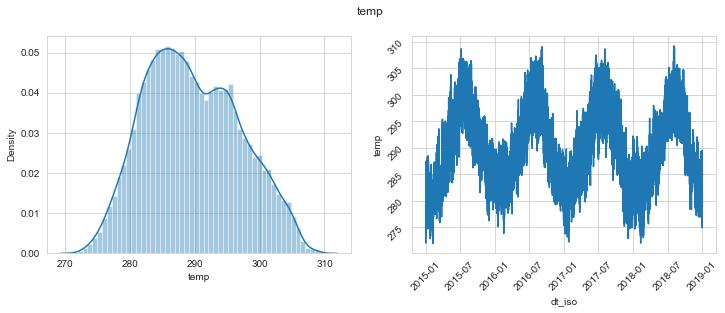

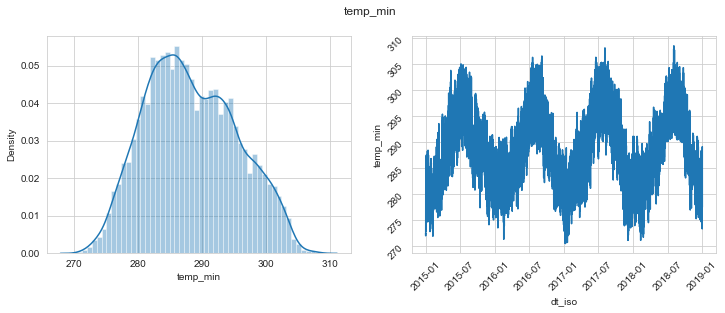

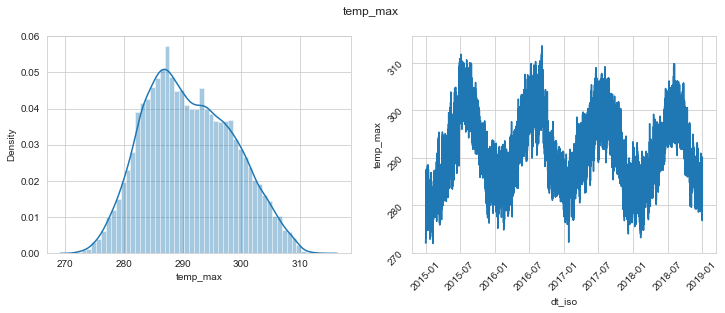

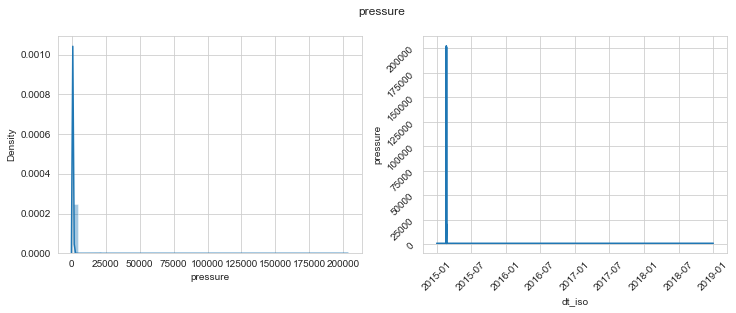

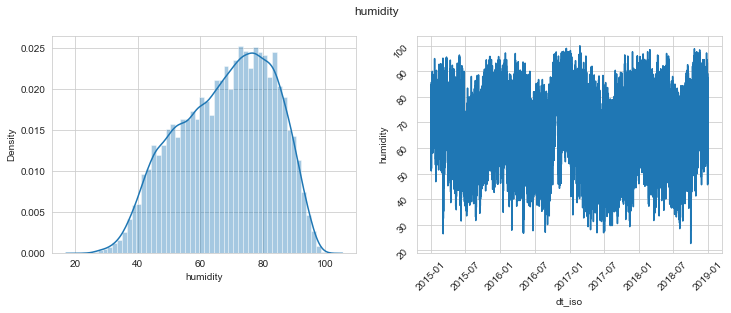

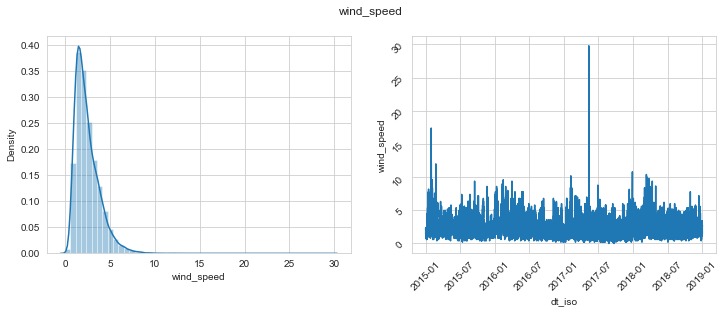

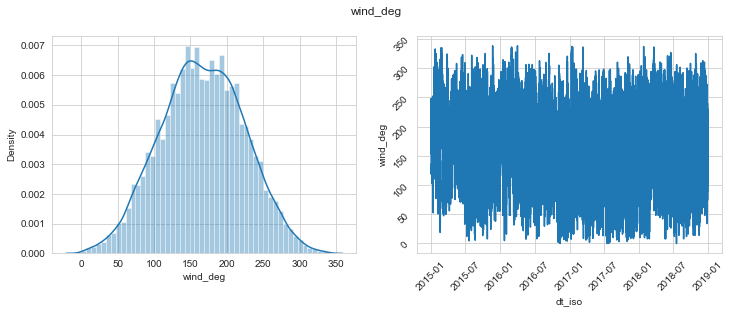

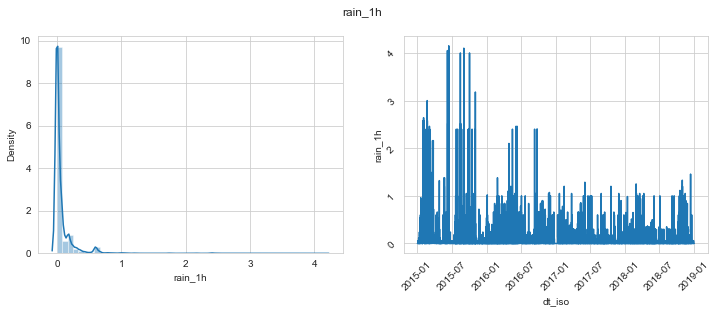

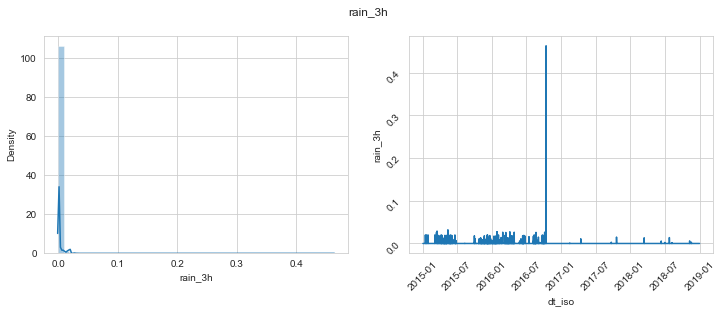

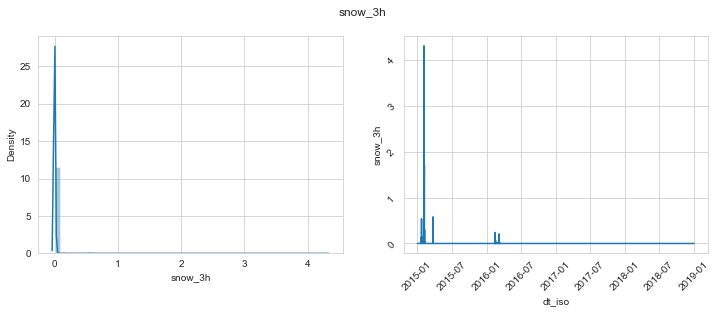

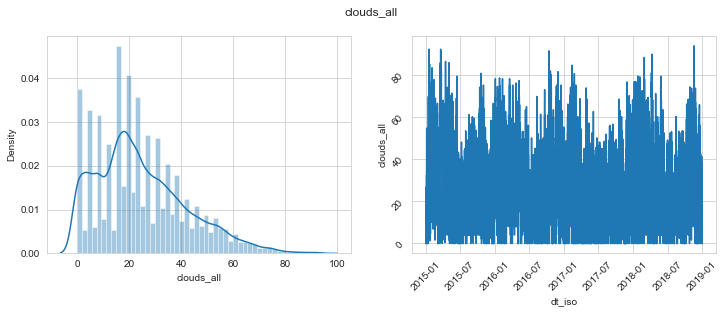

In [32]:
for feat in list(df_weather2.columns):
    if feat not in ['dt_iso']:
        dist_line_plot(df_weather2, 'dt_iso', feat)

There was heavy snow in 2015 and heavy rain in 2016. We may have to crop those extreme data a little to smooth the data distribution.

## Featrue Coorelation

In [33]:
df = pd.merge(df_energy, df_weather2, left_on='time', right_on='dt_iso')

In [34]:
feats = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all']

target = 'price actual'

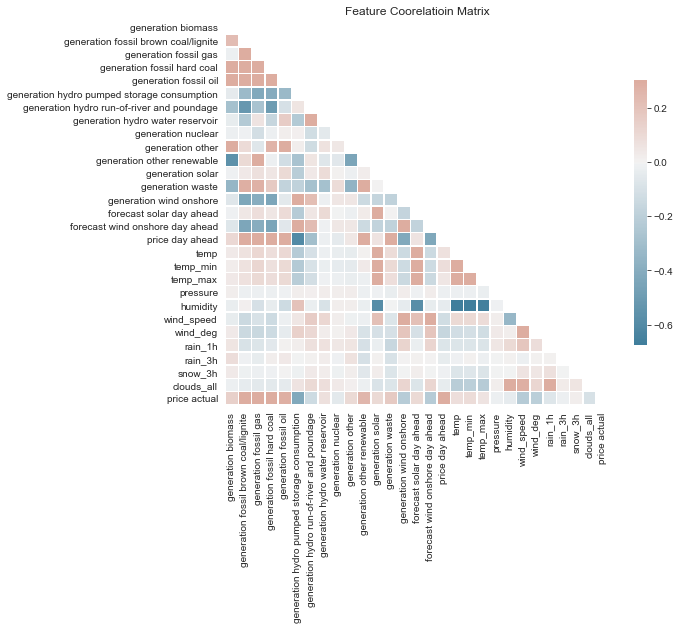

In [84]:
corr = df[feats + [target]].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Feature Coorelatioin Matrix")
plt.tight_layout()

# 2. Data Modeling

In [7]:
class DataModeler:
    def __init__(self):
        pass

    def _parametrized(dec):
        def layer(*args, **kwargs):
            def repl(f):
                return dec(f, *args, **kwargs)
            return repl
        return layer

    @staticmethod
    @_parametrized
    def logger(f, job):
        def aux(self, *xs, **kws):
            print(job + "...", end='\t')
            res = f(self, *xs, **kws)
            print("Done")
            return res
        return aux

## Data Loading

In [32]:
data_dir = './data/'
df_energy = pd.read_csv(data_dir + 'energy_dataset.csv')
df_weather = pd.read_csv(data_dir + 'weather_features.csv')

## Data Preprocessing

In [33]:
class DataPreprocessor(DataModeler):
    "Wrap the operations of data preprocessing."
    
    def __init__(self):
        super(DataPreprocessor, self).__init__()


    @DataModeler.logger("Filling missing value")
    def _fill_missing_value(self, df:pd.DataFrame) -> pd.DataFrame:
        """
        Fill missing values in input data.
        @param df: dataframe
        return: processed dataframe
        """
        res = df.fillna(method='ffill')

        return res
    

    @DataModeler.logger("Transforming feature type")
    def _trans_feat_type(self, df_energy:pd.DataFrame, df_weather:pd.DataFrame) -> List[pd.DataFrame]:
        """
        Transform data type of some columns.
        @param df_energy: energy data
        @param df_weather: weather data
        return: processed data
        """
        df_energy['time'] = pd.to_datetime(df_energy['time'])
        df_weather['time'] = pd.to_datetime(df_weather['time'])

        return df_energy, df_weather


    @DataModeler.logger("Combining weather data")
    def _combine_weather_data(self, df:pd.DataFrame) -> pd.DataFrame:
        """
        Combine weather data from different cities so that 
            it can be joined on the energy data.
        @param df: dataframe
        return: processed dataframe
        """
        num_feats = [
            'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 
            'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 
            'snow_3h', 'clouds_all'
        ]
        res = df[num_feats+['time']].groupby(['time'], as_index=False).mean()
        
        return res
    
    def preprocess(self, df_energy_:pd.DataFrame, df_weather_:pd.DataFrame) -> pd.DataFrame:
        """
        Preprocess energy data and weather data and then join them together.
        @param df_energy_: energy data
        @param df_weather_: weather data
        return: combined clean energy and weather data
        """
        df_energy = df_energy_.copy()
        df_weather = df_weather_.copy()
        df_weather = df_weather.rename(columns={'dt_iso':'time'})

        #* Fill missing value
        df_energy = self._fill_missing_value(df_energy)

        #* Transform feature type
        df_energy, df_weather = self._trans_feat_type(df_energy, df_weather)

        #* Drop invalid columns
        cols_to_drop = ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'] +\
                        ['generation fossil coal-derived gas', 'generation wind offshore', 'generation fossil oil shale', 
                        'generation fossil peat', 'generation geothermal', 'generation marine']
        df_energy = df_energy.drop(cols_to_drop, axis=1)

        #* Combine weather data
        df_weather = self._combine_weather_data(df_weather)

        #* Join energy data and weather data
        df = pd.merge(df_energy, df_weather, on=['time'])
        df = df.sort_values(by='time', ascending=True).reset_index(drop=True)
        return df

In [34]:
data_preprocessor = DataPreprocessor()

In [35]:
df = data_preprocessor.preprocess(df_energy, df_weather)

Filling missing value...	Done
Transforming feature type...	Done
Combining weather data...	Done


## Feature Engineering

In [36]:
class FeatureEngineer(DataModeler):
    "Wrap the operations of feature engineering."
    
    def __init__(self):
        super(FeatureEngineer, self).__init__()
    
    def generate_feats(self, df:pd.DataFrame) -> pd.DataFrame:
        """
        Generate new features.
        @param df: dataframe
        return: dataframe with new features
        """
        
        return df

In [37]:
feat_engineer = FeatureEngineer()

In [38]:
df = feat_engineer.generate_feats(df)

## Build Model

In [39]:
from sklearn.model_selection import TimeSeriesSplit

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [41]:
from sklearn.metrics import mean_squared_error

In [66]:
test_ratio = 0.2
test_idx = df.index > round(df.shape[0]*(1-test_ratio))

In [67]:
df_train = df[~test_idx].reset_index(drop=True)
df_test = df[test_idx].reset_index(drop=True)

In [44]:
class Learner(DataModeler):
    def __init__(self):
        super(Learner, self).__init__()

        self.model_dict = {
            'LR':    {'class':LinearRegression,      'model':[]},
            'Ridge': {'class':Ridge,                 'model':[]},
            'Lasso': {'class':Lasso,                 'model':[]},
            'RF':    {'class':RandomForestRegressor, 'model':[]},
            'SVM':   {'class':SVR,                   'model':[]}
        }
    

    def train(self, df:pd.DataFrame, target:str, feats:List[str], nfold:int, model_name:str, model_param:dict, metric_func):
        """
        Model training
        @param df: trainset
        @param target: predicting target column name
        @param nfold: cross validation fold number
        @param feats: features to be used for training model
        @param model_name: model name, must be one of keys in model_dict
        @param model_param: model parameter dict
        @param metric_func: metric function
        """
        metric_l = []
        self.model_dict[model_name]['model'] = []

        for (trn_idx, val_idx) in tqdm(TimeSeriesSplit(nfold).split(df[feats]), total=nfold, desc="Training"):
            train_x = df.loc[trn_idx, feats]
            train_y = df.loc[trn_idx, target]
            valid_x = df.loc[val_idx, feats]
            valid_y = df.loc[val_idx, target]

            model = self.model_dict[model_name]['class'](**model_param).fit(train_x, train_y)
            valid_pred = model.predict(valid_x)
            metric = metric_func(valid_y, valid_pred)
            metric_l.append(metric)
            self.model_dict[model_name]['model'].append(model)
        
        print(f"{model_name} End of training, avg metric: {np.mean(metric_l)}")
    
    def _single_predict(self, df:pd.DataFrame, feats:List[str], model_name:str) -> np.array:
        """
        Use single model to predict
        @param df: testset
        @param feats: features used for training mdoel
        @param model_name: model name, must be one of keys in model_dict and has been trained
        return: prediction
        """
        pred_l = []
        for model in self.model_dict[model_name]['model']:
            pred_l.append(model.predict(df[feats].values).tolist())

        pred = np.mean(np.array(pred_l), axis=0)
        return pred
    
    def predict(self, df:pd.DataFrame, feats:List[str], models=None) -> np.array:
        """
        Use all the models that have been trained before to predict
        @param df: testset
        @param feats: features used for training mdoel
        @param models: list of model names to predict, if None then use all models
        return: prediction
        """
        pred_l = []
        if models is None:
            models = [x for x in self.model_dict.keys() if len(self.model_dict[x]['model'])>0]
        
        for model in tqdm(models, "Predicting"):
            tmp = self._single_predict(df, feats, model)
            pred_l.append(tmp.tolist())
        
        pred = np.mean(np.array(pred_l), axis=0)
        return pred

In [68]:
learner = Learner()

In [69]:
df_train[target] = df_train[target].shift(-1)

In [70]:
df_train = df_train.iloc[:-1]

In [71]:
feats = ['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'price day ahead',
       'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all']
# 'total load forecast', 'total load actual'

target = 'price actual'

In [72]:
learner.train(df_train, target, feats, 5, 'LR', {}, mean_squared_error)

Training: 100%|██████████| 5/5 [00:00<00:00, 29.59it/s]

LR End of training, avg metric: 141.9984752094441


In [73]:
learner.train(df_train, target, feats, 5, 'Ridge', {}, mean_squared_error)

Training: 100%|██████████| 5/5 [00:00<00:00, 42.73it/s]

Ridge End of training, avg metric: 142.02760934047086


In [74]:
learner.train(df_train, target, feats, 5, 'Lasso', {}, mean_squared_error)

Training: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]

Lasso End of training, avg metric: 137.27878735211243


In [75]:
learner.train(df_train, target, feats, 5, 'RF', {}, mean_squared_error)

Training: 100%|██████████| 5/5 [02:08<00:00, 25.62s/it]

RF End of training, avg metric: 206.32403849970993


In [76]:
learner.train(df_train, target, feats, 5, 'SVM', {}, mean_squared_error)

Training: 100%|██████████| 5/5 [01:25<00:00, 17.11s/it]

SVM End of training, avg metric: 183.79512274383694


In [82]:
pred = learner.predict(df_test, feats, ['LR', 'Lasso', 'Ridge', 'RF', 'SVM'])

Predicting: 100%|██████████| 5/5 [00:53<00:00, 10.65s/it]


In [83]:
mean_squared_error(df_test[target], pred)

88.28987086912483

In [79]:
df_test['pred'] = pred

In [80]:
df_test[['time', 'price day ahead', 'price actual', 'pred']].head(48)

,time,price day ahead,price actual,pred
0,2018-03-14 20:00:00+01:00,48.21,59.73,50.599209
1,2018-03-14 21:00:00+01:00,41.11,50.89,45.212712
2,2018-03-14 22:00:00+01:00,36.72,45.94,45.909116
3,2018-03-14 23:00:00+01:00,21.20,30.59,39.777918
4,2018-03-15 00:00:00+01:00,25.36,32.54,40.406323
5,2018-03-15 01:00:00+01:00,12.40,20.14,33.625476
6,2018-03-15 02:00:00+01:00,5.48,14.66,31.455492
7,2018-03-15 03:00:00+01:00,5.48,13.54,30.770800
8,2018-03-15 04:00:00+01:00,5.48,13.77,30.476324
9,2018-03-15 05:00:00+01:00,8.55,17.37,32.237831


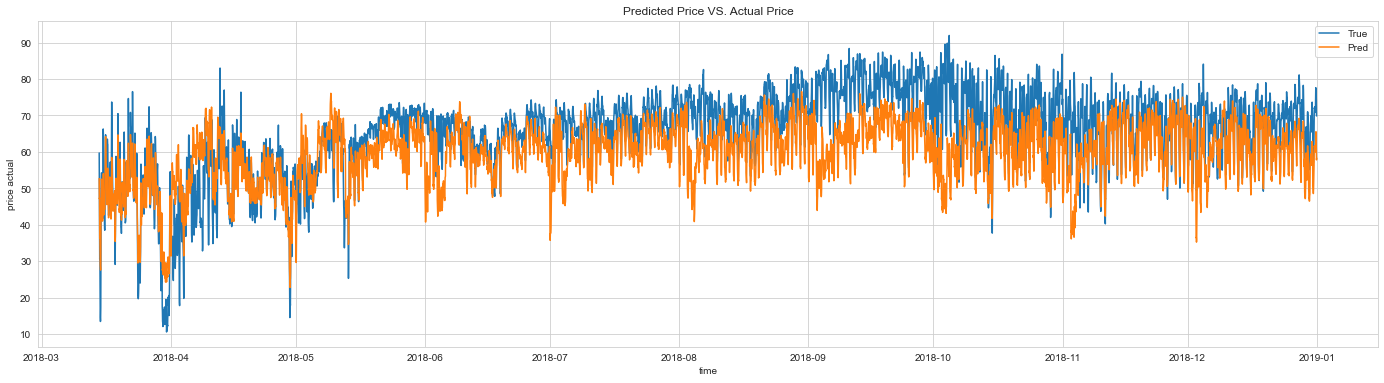

In [85]:
plt.figure(figsize=(24,6))
ax = plt.subplot(111)
sns.lineplot(x='time', y=target, data=df_test, label='True', ax=ax)
sns.lineplot(x='time', y=pred, data=df_test, label='Pred', ax=ax)
plt.title("Predicted Price VS. Actual Price")
plt.show()